# Markov Chain Generator

In [1]:
# !pip install nltk
# !pip install spacy
# !pip install markovify
# !pip install -m spacy download en
import spacy
import re
import markovify
import nltk
from nltk.corpus import gutenberg
import warnings
import os
import re
warnings.filterwarnings('ignore')

In [2]:
directory=r'C:/Users/PROMIT/Desktop/7thSem/EE692/csv-20231025T183206Z-001/csv'
names=[]
texts=[]
for filename in os.listdir(directory):
  
        if filename.split('.')[1]=='txt':
            file=open(directory+'/'+filename,'r',encoding="utf8")
            text=file.readlines()
            texts.append(text)
            names.append(filename.split('.')[0])
#flattening 
corpus=[]
for text in texts:
    for f_text in text:
        corpus.append(f_text)

print("Training_Data {}".format(len(corpus)))

corpus_new=[]
for item in corpus:
    corpus_new.append(item.rstrip('\n'))
    
text=''
for item in corpus_new:
    temp_string=''
    for string in item.split('.'):
        temp_string+='<SOS> '+string+' <EOS>'+' . '
    text+=temp_string

Training_Data 2209


In [3]:
import random
from collections import defaultdict
class MarkovChain:
    def __init__(self, n_gram_range=(2, 8)):
        self.n_gram_range = n_gram_range
        self.chain = defaultdict(lambda: defaultdict(int))

    def tokenize_text(self, text):
        # Custom tokenization function that splits text into sentences and words
        sentences = text.split('.')
        tokens = []
        for sentence in sentences:
            words = sentence.split()
            if words:
                tokens.extend(words)
        return tokens

    def train(self, text):
        tokens = self.tokenize_text(text)
        for n in range(*self.n_gram_range):
            n_grams = [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]
            for n_gram in n_grams:
                current_state = n_gram[:-1]
                next_word = n_gram[-1]
                self.chain[current_state][next_word] += 1

        # Compute transition probabilities
        for state, next_words in self.chain.items():
            total_transitions = sum(next_words.values())
            for word in next_words:
                self.chain[state][word] /= total_transitions

    def generate_text(self, length=100, seed=None):
        if seed is None:
            state = ()
            while state == () or state not in self.chain:
                state = random.choice(list(self.chain.keys()))
        else:
            seed = seed.split()
            state = tuple(seed)

        text = list(state)
        for _ in range(length):
            next_word = self._choose_next_word(state)
            text.append(next_word)
            state = state[1:] + (next_word,)

        return ' '.join(text)

    def _choose_next_word(self, state):
        next_words = self.chain[state]
        if next_words:
            return random.choices(list(next_words.keys()), weights=list(next_words.values()))[0]
        else:
            return ""

In [4]:
text[1000:2000]

's Barber, and a private individual <EOS> . <SOS>  The Bodleian Libraries are very grateful for this additional support, which brings new features to the digitized First Folio, enabling more efficient and intuitive use for all with an interest in Shakespeare, early modern drama, theatre and book history <EOS> . <SOS>   Find out more about this book’s remarkable history, the campaign, and the work that led to its digitization <EOS> . <SOS>    A  MIDSOMMER  Nights  Actus primus <EOS> . <SOS>   Enter Theseus, Hippolita, with others <EOS> . <SOS>   NOw faire Hippolita, our nuptiall houre Drawes on apace: foure happy daies bring in Another Moon: but oh, me thinkes, how slow This old Moon wanes; She lingers my desires Like to a Step-dame, or a Dowager, Long withering out a yong mans reuennew <EOS> . <SOS>   Foure daies wil quickly steep (theēselues)themselues in nights Foure nights wil quickly dreame away the time: And then the Moone, like to a siluer bow, Now bent in heauen, shal behold the

In [5]:
import time 
markov = MarkovChain(n_gram_range=(2,30))
markov.train(text)

In [6]:
def remove_patterns(text, patterns):
    t=''
    for item in patterns_to_remove:
        t+='|'+item
    t.lstrip('|')
    s=re.sub(t, '', text)
    s=re.sub(r'<EOS>','.',s)
    return s
#------------------------------------------------------------------------------------------------------------------------------#
generated_text = markov.generate_text(length=50,seed='Caesar')
# Example usage:
text = generated_text
patterns_to_remove = [r';', r'<SOS>']
cleaned_text = remove_patterns(text, patterns_to_remove)
print(cleaned_text)

Caesar from the amorous Count Orsino's Court, Vnlesse it last breath, Therefore know her to preuent, Let him for Loues Labour's lost not greeue thee, none so contrary I haue his eie-sight to say she will helpe .  Oh sweet Roses, You call from his body but farewell . 


In [7]:
temp_dict={}
for key in list(markov.chain.keys()):
    temp_dict[key]=markov.chain[key]

In [10]:
import pickle 
with open('your_data.pkl', 'wb') as f:
    pickle.dump(temp_dict, f, protocol=4)

In [11]:
import time 
start=time.time()
with open('your_data.pkl', 'rb') as f:
    your_data = pickle.load(f)
end=time.time() 
print(end-start)

303.9001693725586


In [9]:
# SOME SEEDS
seeds=['Caesar','Romeo','Sun','Women','Men']
generated_texts=[]
length=50
for item in seeds:
    try:
        generated_text=markov.generate_text(length=length,seed=item)
        cleaned_text=remove_patterns(generated_text,patterns_to_remove)
        generated_texts.append(cleaned_text)
    except:
        continue
for text in generated_texts:
    print(text)
    print('\n')

Caesar from http://firstfolio .  I am that I am a iealous .  I saue his vneffectuall Fire: Adue, Remember Boyes vnto the young and Fords wiues for: Redeeme thy behauiour Fit for Why is liuing, if it me, and the Bodleian First praise .  yeres wants the Count


Romeo Hath seal'd in his offence? For I am Anthony but recompenc'd, though she may chance, I marry sir, thought of the words before your holy I will serue your loues her, and you question with my life, I will haue seene her hands? All for my outward fauour was said


Sun aduance their Vrine for her be dry .  I sir, then will haue prerogatiue, And some Planet had beene betweene thy offence, I cannot get thee of: therefore may proue the Thou canst get you three or anticke, or brooke the strangers to night, As time, To doubt but


Women promis'd, And so dull watch to him, branded His voyce so, fare you one) He, he, my shallow simple Sillogisme will he, Cuckow, Cuckow: O on the fit for he assailes, and of this oppor tunity .  Why I ca

In [11]:
markov.chain

defaultdict(<function __main__.MarkovChain.__init__.<locals>.<lambda>()>,
            {('<SOS>',): defaultdict(int,
                         {'A': 0.013562002067749193,
                          'Published': 0.0010946907498631637,
                          '—': 0.0012163230554035152,
                          '7': 0.0012163230554035152,
                          'bodleian': 0.0012163230554035152,
                          'ox': 0.0012163230554035152,
                          'ac': 0.0012163230554035152,
                          'uk/,': 0.0012163230554035152,
                          '0': 0.0012163230554035152,
                          'The': 0.024144012649759777,
                          'Find': 0.0013379553609438666,
                          'Enter': 0.03539500091224229,
                          'NOw': 6.081615277017576e-05,
                          'Foure': 6.081615277017576e-05,
                          'Go': 0.004196314541142127,
                          'Stand': 0.001216

In [16]:
#Saving
import pickle
a_file = open("Markov.pkl", "wb")
pickle.dump(temp_dict, a_file)

In [ ]:
a_file = open("Markov.pkl", "rb")
output = pickle.load(a_file)

# LSTM

In [223]:
# text=text[:100000]

In [12]:
text=''
for item in corpus_new:
    temp_string=''
    for string in item.split('.'):
        temp_string+=string+' . '
    text+=temp_string

In [13]:
corpus_new=[]
for item in corpus:
    corpus_new.append(item.rstrip('\n'))
text=''
for item in corpus_new:
    temp_string=''
    for string in item.split('.'):
        temp_string+=string+' . '
    text+=temp_string

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

training_data=text

tokenizer=Tokenizer()
tokenizer.fit_on_texts([training_data])
total_words=len(tokenizer.word_index)+1

input_sequences=[]
for line in training_data.split('.'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(5,50):
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [15]:
input_sequences=input_sequences[:100000]

In [16]:
len(input_sequences)

100000

In [17]:
# Pad sequences
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
# Create predictors and labels
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = np.array(label)
label = to_categorical(label, num_classes=total_words)

In [18]:
model=Sequential()
model.add(Embedding(input_dim=total_words, output_dim=256, input_length=max_sequence_length - 1))
model.add(LSTM(units=256,return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
training_logs=model.fit(predictors,label,epochs=100,verbose=2,batch_size=32,validation_split=0.2)

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
# Generate text using the trained model
seed_text = "Love between Romeo and "
next_words = 20
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted_probs)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

In [214]:
#More training
training_more_logs=model.fit(predictors,label,epochs=100,verbose=1,batch_size=64)

Epoch 1/100
275/275 [==============================] - 17s 63ms/step - loss: 0.4362
Epoch 2/100
275/275 [==============================] - 28s 103ms/step - loss: 0.4226
Epoch 3/100
275/275 [==============================] - 28s 102ms/step - loss: 0.4024
Epoch 4/100
275/275 [==============================] - 33s 118ms/step - loss: 0.3867
Epoch 5/100
275/275 [==============================] - 27s 98ms/step - loss: 0.3764
Epoch 6/100
275/275 [==============================] - 33s 119ms/step - loss: 0.3604
Epoch 7/100
275/275 [==============================] - 38s 138ms/step - loss: 0.3529
Epoch 8/100
275/275 [==============================] - 29s 107ms/step - loss: 0.3430
Epoch 9/100
275/275 [==============================] - 34s 125ms/step - loss: 0.3307
Epoch 10/100
275/275 [==============================] - 29s 105ms/step - loss: 0.3120
Epoch 11/100
275/275 [==============================] - 28s 101ms/step - loss: 0.2958
Epoch 12/100
275/275 [==============================] - 28s 101ms

KeyboardInterrupt: 

In [216]:
#More training
training_more_logs_more=model.fit(predictors,label,epochs=200,verbose=1,batch_size=64,validation_split=0.2)

Epoch 1/200
220/220 [==============================] - 26s 119ms/step - loss: 0.1118 - val_loss: 0.1116
Epoch 2/200
220/220 [==============================] - 24s 111ms/step - loss: 0.1081 - val_loss: 0.1167
Epoch 3/200
220/220 [==============================] - 24s 109ms/step - loss: 0.0857 - val_loss: 0.1203
Epoch 4/200
220/220 [==============================] - 24s 109ms/step - loss: 0.0823 - val_loss: 0.1276
Epoch 5/200
220/220 [==============================] - 24s 109ms/step - loss: 0.0680 - val_loss: 0.1241
Epoch 6/200
220/220 [==============================] - 24s 108ms/step - loss: 0.0596 - val_loss: 0.1287
Epoch 7/200
220/220 [==============================] - 23s 106ms/step - loss: 0.0535 - val_loss: 0.1316
Epoch 8/200
220/220 [==============================] - 24s 107ms/step - loss: 0.0494 - val_loss: 0.1351
Epoch 9/200
220/220 [==============================] - 25s 115ms/step - loss: 0.0467 - val_loss: 0.1409
Epoch 10/200
220/220 [==============================] - 24s 109m

220/220 [==============================] - 26s 116ms/step - loss: 0.0165 - val_loss: 1.7256
Epoch 80/200
220/220 [==============================] - 24s 111ms/step - loss: 0.0098 - val_loss: 1.6786
Epoch 81/200
220/220 [==============================] - 25s 113ms/step - loss: 0.0082 - val_loss: 1.6660
Epoch 82/200
220/220 [==============================] - 25s 113ms/step - loss: 0.0074 - val_loss: 1.6578
Epoch 83/200
220/220 [==============================] - 25s 112ms/step - loss: 0.0068 - val_loss: 1.6488
Epoch 84/200
220/220 [==============================] - 25s 115ms/step - loss: 0.0063 - val_loss: 1.6486
Epoch 85/200
220/220 [==============================] - 25s 116ms/step - loss: 0.0059 - val_loss: 1.6396
Epoch 86/200
220/220 [==============================] - 25s 112ms/step - loss: 0.0055 - val_loss: 1.6400
Epoch 87/200
220/220 [==============================] - 25s 116ms/step - loss: 0.0052 - val_loss: 1.6336
Epoch 88/200
220/220 [==============================] - 25s 115ms/st

KeyboardInterrupt: 

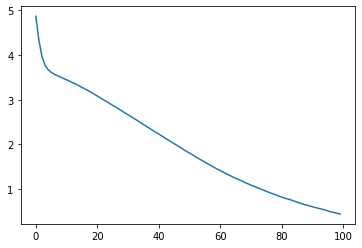

In [211]:
losses=training_logs.history['loss']
import matplotlib.pyplot as plt
plt.plot(losses)

In [219]:
# Generate text using the trained model
seed_text = "Love between Romeo and "
next_words = 20
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted_probs)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

Love between Romeo and  play looke in is terribly you euen i yet ist that do longer done eos when no name be could


In [4]:
vocabulary=sorted(set(text))
print('No. of unique characters: {}'.format(len(vocabulary)))

No. of unique characters: 111


In [7]:
#Testing
#character to index mapping
import numpy as np
char2index = {c:i for i,c in enumerate(vocabulary)}
int_text = np.array([char2index[i] for i in text])

#Index to character mapping
index2char = np.array(vocabulary)
print("Character to Index: \n")
for char,_ in zip(char2index, range(65)):
    print('  {:4s}: {:3d}'.format(repr(char), char2index[char]))

print("\nInput text to Integer: \n")
print('{} mapped to {}'.format(repr(text[:20]),int_text[:20])) #use repr() for debugging

Character to Index: 

  '\x00':   0
  ' ' :   1
  '!' :   2
  '"' :   3
  '#' :   4
  '&' :   5
  "'" :   6
  '(' :   7
  ')' :   8
  ',' :   9
  '-' :  10
  '.' :  11
  '/' :  12
  '0' :  13
  '1' :  14
  '2' :  15
  '3' :  16
  '4' :  17
  '5' :  18
  '7' :  19
  ':' :  20
  ';' :  21
  '<' :  22
  '=' :  23
  '>' :  24
  '?' :  25
  'A' :  26
  'B' :  27
  'C' :  28
  'D' :  29
  'E' :  30
  'F' :  31
  'G' :  32
  'H' :  33
  'I' :  34
  'J' :  35
  'K' :  36
  'L' :  37
  'M' :  38
  'N' :  39
  'O' :  40
  'P' :  41
  'Q' :  42
  'R' :  43
  'S' :  44
  'T' :  45
  'U' :  46
  'V' :  47
  'W' :  48
  'X' :  49
  'Y' :  50
  'Z' :  51
  'a' :  52
  'b' :  53
  'c' :  54
  'd' :  55
  'e' :  56
  'f' :  57
  'g' :  58
  'h' :  59
  'i' :  60
  'j' :  61
  'k' :  62
  'l' :  63
  'm' :  64

Input text to Integer: 

'<SOS> A Midsommer Ni' mapped to [22 44 40 44 24  1 26  1 38 60 55 70 66 64 64 56 69  1 39 60]


In [9]:
import tensorflow as tf 
seq_length= 150 #max number of characters that can be fed as a single input
examples_per_epoch = len(text)

#converts text (vector) into character index stream
#Reference: https://www.tensorflow.org/api_docs/python/tf/data/Dataset
char_dataset = tf.data.Dataset.from_tensor_slices(int_text)

In [10]:
seq_length= 150 #max number of characters that can be fed as a single input
examples_per_epoch = len(text)

#converts text (vector) into character index stream
#Reference: https://www.tensorflow.org/api_docs/python/tf/data/Dataset
char_dataset = tf.data.Dataset.from_tensor_slices(int_text )

In [11]:
#Create sequences from the individual characters. Our required size will be seq_length + 1 (character RNN)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True) 

In [12]:
#Testing
print("Character Stream: \n")
for i in char_dataset.take(10):
  print(index2char[i.numpy()])  

print("\nSequence: \n")
for i in sequences.take(10):
  print(repr(''.join(index2char[i.numpy()])))  #use repr() for more clarity. str() keeps formatting it

Character Stream: 

<
S
O
S
>
 
A
 
M
i

Sequence: 

'<SOS> A Midsommer Nights Dreame  from  William Shakespeares comedies, histories, & tragedies <EOS> . <SOS>  Published according to the true originall c'
'opies <EOS> . <SOS>  —  VVilliam Shakespeares comedies, histories, & tragedies — Bodleian First Folio,  G c <EOS> . <SOS> 7  This text was downloaded f'
'rom http://firstfolio <EOS> . <SOS> bodleian <EOS> . <SOS> ox <EOS> . <SOS> ac <EOS> . <SOS> uk/, where you can also find digital images of the Bodleia'
'n First  It is published by the Bodleian Libraries, University of Oxford, under a CC BY 3 <EOS> . <SOS> 0 licence <EOS> . <SOS>    The first phase of t'
'he Bodleian First Folio project, to conserve the book, photograph it, and publish the images freely online, was funded, with grateful thanks, by donati'
'ons from the public <EOS> . <SOS>   The second phase of the Bodleian First Folio project was made possible by a lead gift from Dr Geoffrey Eibl-Kaye an'
'd generous support fro

In [13]:
def create_input_target_pair(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(create_input_target_pair)

In [14]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(index2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(index2char[target_example.numpy()])))

Input data:  '<SOS> A Midsommer Nights Dreame  from  William Shakespeares comedies, histories, & tragedies <EOS> . <SOS>  Published according to the true originall '
Target data: 'SOS> A Midsommer Nights Dreame  from  William Shakespeares comedies, histories, & tragedies <EOS> . <SOS>  Published according to the true originall c'


In [15]:
#Creating batches

BATCH_SIZE = 64

# Buffer used to shuffle the dataset 
# Reference: https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 150), dtype=tf.int32, name=None), TensorSpec(shape=(64, 150), dtype=tf.int32, name=None))>

In [16]:
vocab_size = len(vocabulary)
embedding_dim = 256
rnn_units= 1024

In [17]:
def build_model_lstm(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units, 
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
    return model

# Reference for theory: https://jhui.github.io/2017/03/15/RNN-LSTM-GRU/

In [18]:
lstm_model = build_model_lstm(
  vocab_size = vocab_size,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [19]:
#Testing: shape
for input_example_batch, target_example_batch in dataset.take(1):
    example_prediction = lstm_model(input_example_batch)
    assert (example_prediction.shape == (BATCH_SIZE, seq_length, vocab_size)), "Shape error"
    #print(example_prediction.shape)

In [20]:
sampled_indices = tf.random.categorical(example_prediction[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [21]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

#Loss Function reference: https://www.dlology.com/blog/how-to-use-keras-sparse_categorical_crossentropy/

example_loss  = loss(target_example_batch, example_prediction)
print("Prediction shape: ", example_prediction.shape)
print("Loss:      ", example_loss.numpy().mean())

Prediction shape:  (64, 150, 111)
Loss:       4.7085195


In [22]:
lstm_model.compile(optimizer='adam', loss=loss)

In [23]:
lstm_dir_checkpoints= './training_checkpoints_LSTM'
checkpoint_prefix = os.path.join(lstm_dir_checkpoints, "checkpt_{epoch}") #name
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,save_weights_only=True)

In [24]:
EPOCHS=100

In [ ]:
history = lstm_model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/100
262/262 [==============================] - 1742s 7s/step - loss: 2.2814
Epoch 2/100
262/262 [==============================] - 1850s 7s/step - loss: 1.6491
Epoch 3/100
262/262 [==============================] - 13923s 53s/step - loss: 1.4725
Epoch 4/100
194/262 [=====================>........] - ETA: 8:26 - loss: 1.3900